In [ ]:
import pandas as pd
import os

In [ ]:
Covid_Data = pd.read_csv("/content/Covid Data.csv")
chronic_diseases = pd.read_csv("/content/chronic kidney disease.csv")
diabetes_disease = pd.read_csv("/content/diabetes_binary_health_indicators_BRFSS2015.csv")
heart_disease = pd.read_csv("/content/heart.csv")
Liver_disease = pd.read_csv("/content/indian+liver+patient+dataset.csv")
Lungs_disease = pd.read_csv("/content/lung_disease_data.csv")

In [ ]:
li = [Covid_Data,chronic_diseases,diabetes_disease,heart_disease,Liver_disease,Lungs_disease]

# Task
Inspect and pre-process the `Covid_Data`, `chronic_diseases`, `diabetes_disease`, `heart_disease`, `Liver_disease`, and `Lungs_disease` DataFrames, handling missing values, duplicates, and data types, and then summarize the pre-processing steps for each dataset.

## Initial Data Inspection for Covid_Data

### Subtask:
Perform an initial inspection of the `Covid_Data` DataFrame. This includes checking data types, identifying the number and location of missing values, and viewing descriptive statistics to understand the data's distribution and potential issues.


**Reasoning**:
To perform an initial inspection of the `Covid_Data` DataFrame, I will display its concise summary, count missing values per column, and show descriptive statistics of numerical columns, all in one code block.



In [ ]:
Covid_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625424 entries, 0 to 625423
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   USMER                 625424 non-null  int64  
 1   MEDICAL_UNIT          625424 non-null  int64  
 2   SEX                   625424 non-null  int64  
 3   PATIENT_TYPE          625424 non-null  int64  
 4   DATE_DIED             625424 non-null  object 
 5   INTUBED               625424 non-null  int64  
 6   PNEUMONIA             625424 non-null  int64  
 7   AGE                   625424 non-null  int64  
 8   PREGNANT              625424 non-null  int64  
 9   DIABETES              625424 non-null  int64  
 10  COPD                  625424 non-null  int64  
 11  ASTHMA                625424 non-null  int64  
 12  INMSUPR               625424 non-null  int64  
 13  HIPERTENSION          625424 non-null  int64  
 14  OTHER_DISEASE         625424 non-null  int64  
 15  

In [ ]:
Covid_Data.isnull().sum()


,0
USMER,0
MEDICAL_UNIT,0
SEX,0
PATIENT_TYPE,0
DATE_DIED,0
INTUBED,0
PNEUMONIA,0
AGE,0
PREGNANT,0
DIABETES,0


## Removing column `DATE_DIED`

This column is not required and contains a large number of missing values.


In [ ]:
Covid_Data.drop('DATE_DIED', axis=1, inplace=True)

## Filling missing values using a function

A function is created that takes a DataFrame and a column name as input and fills the missing (NA) values in that column.


In [ ]:
def fill_null_values(df:pd.DataFrame,column:list) -> None:
  """
  Function that use to fill the null values
  It fill nan values on the basis of data type of the column

  param:
  df: DataFrame
  column: list of column name
  """

  for col in column:
    if(df[col].dtype == 'object'):
      df[col].fillna(df[col].mode()[0],inplace=True)
    else:
      df[col].fillna(df[col].mean(),inplace=True)

### Apply the function to all dataframe.

In [ ]:
for df in li:
  fill_null_values(df,df.columns)

/tmp/ipython-input-3435790519.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(),inplace=True)
/tmp/ipython-input-3435790519.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [ ]:
li[0].isna().sum()

,0
USMER,0
MEDICAL_UNIT,0
SEX,0
PATIENT_TYPE,0
INTUBED,0
PNEUMONIA,0
AGE,0
PREGNANT,0
DIABETES,0
COPD,0


In [ ]:
li[1].isna().sum()

,0
Bp,0
Sg,0
Al,0
Su,0
Rbc,0
Bu,0
Sc,0
Sod,0
Pot,0
Hemo,0


In [ ]:
li[3].isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:


# Create a list of original DataFrame names (assuming they match the variable names used during loading)
df_names = ['Covid_Data', 'chronic_diseases', 'diabetes_disease', 'heart_disease', 'Liver_disease', 'Lungs_disease']

# Iterate through the list of DataFrames and save them with the 'Cleaned_' prefix
for i, df in enumerate(li):
    original_name = df_names[i]
    cleaned_name = f"Cleaned_{original_name}.csv"
    output_path = os.path.join("/content/", cleaned_name)
    df.to_csv(output_path, index=False)
    print(f"Saved {original_name} to {output_path}")

Saved Covid_Data to /content/Cleaned_Covid_Data.csv
Saved chronic_diseases to /content/Cleaned_chronic_diseases.csv
Saved diabetes_disease to /content/Cleaned_diabetes_disease.csv
Saved heart_disease to /content/Cleaned_heart_disease.csv
Saved Liver_disease to /content/Cleaned_Liver_disease.csv
Saved Lungs_disease to /content/Cleaned_Lungs_disease.csv


# Task
Define a Python function named `remove_outliers_iqr` that takes a DataFrame and a list of numerical column names as input. This function should identify and remove outliers from the specified columns using the Interquartile Range (IQR) method and return the DataFrame with outliers removed.

In [ ]:
def remove_outliers_iqr(df: pd.DataFrame, columns: list) -> pd.DataFrame:
  """
  Removes outliers from specified numerical columns in a DataFrame using the IQR method.

  Parameters:
  df (pd.DataFrame): The input DataFrame.
  columns (list): A list of column names to process for outlier removal.

  Returns:
  pd.DataFrame: The DataFrame with outliers removed.
  """
  cleaned_df = df.copy()
  for col in columns:
    if pd.api.types.is_numeric_dtype(cleaned_df[col]):
      Q1 = cleaned_df[col].quantile(0.25)
      Q3 = cleaned_df[col].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR
      cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]
    else:
      print(f"Column '{col}' is not numeric and will be skipped for outlier removal.")
  return cleaned_df

## Define Duplicate Removal Function

### Subtask:
Create a Python function that removes duplicate rows from a given DataFrame.


In [ ]:
def remove_duplicates(df: pd.DataFrame) -> pd.DataFrame:
  """
  Removes duplicate rows from a pandas DataFrame.

  Parameters:
  df (pd.DataFrame): The input DataFrame.

  Returns:
  pd.DataFrame: The DataFrame with duplicate rows removed.
  """
  cleaned_df = df.drop_duplicates().copy()
  return cleaned_df

## Process and Visualize Covid_Data

### Subtask:
Apply the duplicate removal function to the `Covid_Data` DataFrame. Then, apply the outlier removal function to relevant numerical columns, such as 'AGE'. Finally, generate visualizations, including a histogram or box plot for 'AGE' to show its distribution and the effect of outlier removal, and a count plot for a key categorical feature like 'SEX' or 'PATIENT_TYPE', ensuring legends are provided for clarity.


In [ ]:
initial_rows = Covid_Data.shape[0]
Covid_Data = remove_duplicates(Covid_Data)
removed_rows = initial_rows - Covid_Data.shape[0]
print(f"Number of duplicate rows removed from Covid_Data: {removed_rows}")


Number of duplicate rows removed from Covid_Data: 467322


In [ ]:
initial_rows_age = Covid_Data.shape[0]
Covid_Data_cleaned_age = remove_outliers_iqr(Covid_Data, ['AGE'])
removed_rows_age = initial_rows_age - Covid_Data_cleaned_age.shape[0]
print(f"Number of rows removed from Covid_Data after outlier removal in 'AGE' column: {removed_rows_age}")

Number of rows removed from Covid_Data after outlier removal in 'AGE' column: 9


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### Visulize the data befor & after removing of outliers.

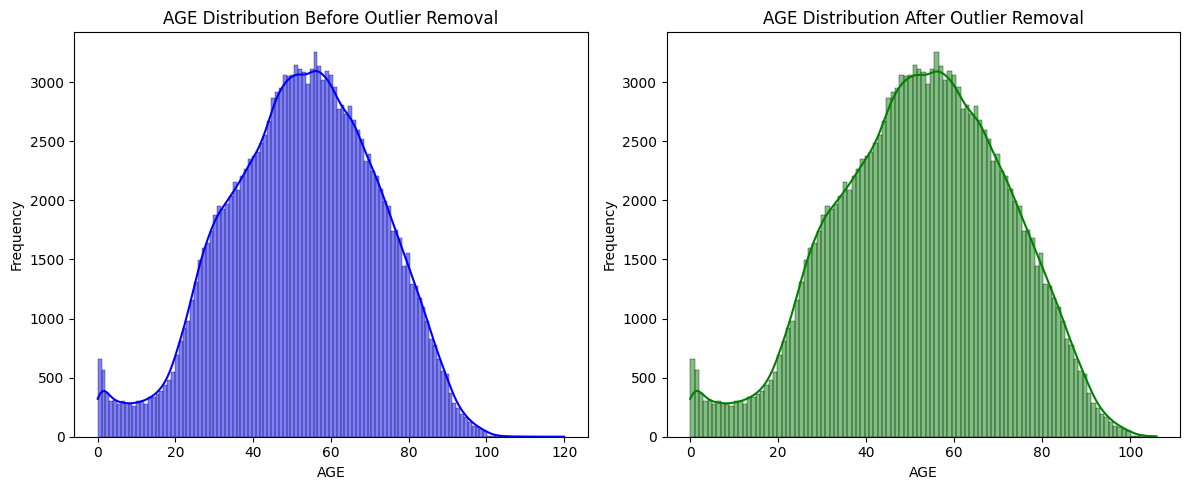

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(Covid_Data['AGE'], kde=True, color='blue')
plt.title('AGE Distribution Before Outlier Removal')
plt.xlabel('AGE')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(Covid_Data_cleaned_age['AGE'], kde=True, color='green')
plt.title('AGE Distribution After Outlier Removal')
plt.xlabel('AGE')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

I will create a count plot for the 'SEX' column in the `Covid_Data_cleaned_age` DataFrame to visualize the distribution of genders after all preprocessing steps. I will add a title and labels for clarity.



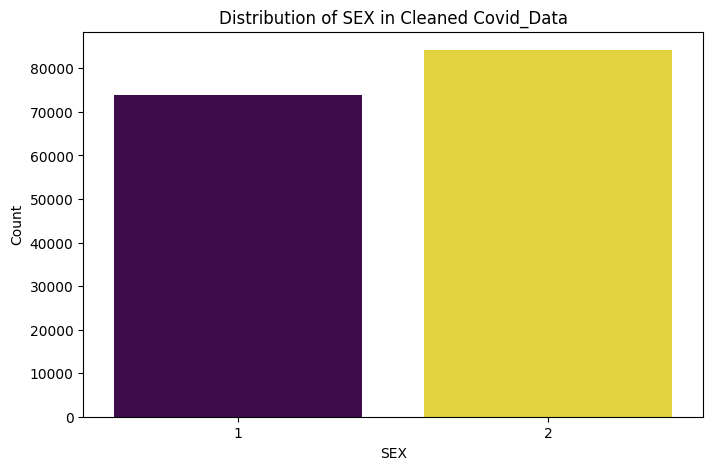

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='SEX', data=Covid_Data_cleaned_age, palette='viridis', hue='SEX', legend=False)
plt.title('Distribution of SEX in Cleaned Covid_Data')
plt.xlabel('SEX')
plt.ylabel('Count')
plt.show()

## Process and Visualize chronic_diseases

### Subtask:
Apply the duplicate removal function to the `chronic_diseases` DataFrame. Then, apply the outlier removal function to relevant numerical columns, such as 'Bp', 'Hemo', and 'Wbcc'. Finally, generate visualizations for selected columns to illustrate data distributions and the impact of cleaning, ensuring legends are provided for clarity.


**Reasoning**:
First, I will apply the `remove_duplicates` function to the `chronic_diseases` DataFrame to remove any duplicate rows. Then, I will report the number of rows removed by comparing the shape of the DataFrame before and after the operation. After removing duplicates, I will remove outliers from the specified columns ('Bp', 'Hemo', and 'Wbcc') using the `remove_outliers_iqr` function and report the number of rows removed.



In [ ]:
initial_rows_chronic = chronic_diseases.shape[0]
chronic_diseases = remove_duplicates(chronic_diseases)
removed_rows_chronic = initial_rows_chronic - chronic_diseases.shape[0]
print(f"Number of duplicate rows removed from chronic_diseases: {removed_rows_chronic}")

initial_rows_chronic_outliers = chronic_diseases.shape[0]
chronic_diseases_cleaned = remove_outliers_iqr(chronic_diseases, ['Bp', 'Hemo', 'Wbcc'])
removed_rows_chronic_outliers = initial_rows_chronic_outliers - chronic_diseases_cleaned.shape[0]
print(f"Number of rows removed from chronic_diseases after outlier removal in 'Bp', 'Hemo', and 'Wbcc' columns: {removed_rows_chronic_outliers}")

Number of duplicate rows removed from chronic_diseases: 0
Number of rows removed from chronic_diseases after outlier removal in 'Bp', 'Hemo', and 'Wbcc' columns: 53



that the duplicate and outlier removal has been performed on the `chronic_diseases` DataFrame, I will visualize the 'Bp' column before and after outlier removal to illustrate the effect of the cleaning process. This will be done using histograms in two subplots.



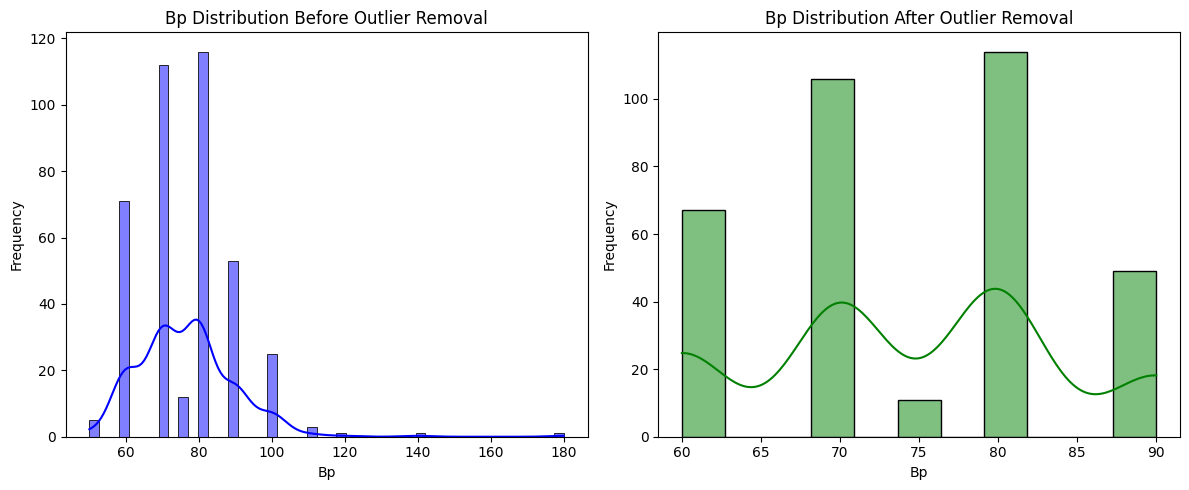

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(chronic_diseases['Bp'], kde=True, color='blue')
plt.title('Bp Distribution Before Outlier Removal')
plt.xlabel('Bp')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(chronic_diseases_cleaned['Bp'], kde=True, color='green')
plt.title('Bp Distribution After Outlier Removal')
plt.xlabel('Bp')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

I will create a histogram for the 'Hemo' column from the `chronic_diseases_cleaned` DataFrame to visualize its distribution after cleaning. I will include a title and labels for clarity.



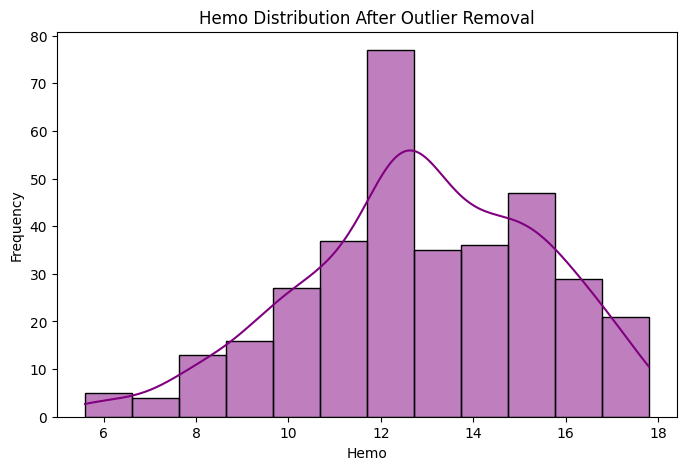

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(chronic_diseases_cleaned['Hemo'], kde=True, color='purple')
plt.title('Hemo Distribution After Outlier Removal')
plt.xlabel('Hemo')
plt.ylabel('Frequency')
plt.show()

**Reasoning**:
Next, I will create a histogram for the 'Wbcc' column from the `chronic_diseases_cleaned` DataFrame to visualize its distribution after cleaning, including a title and labels for clarity.



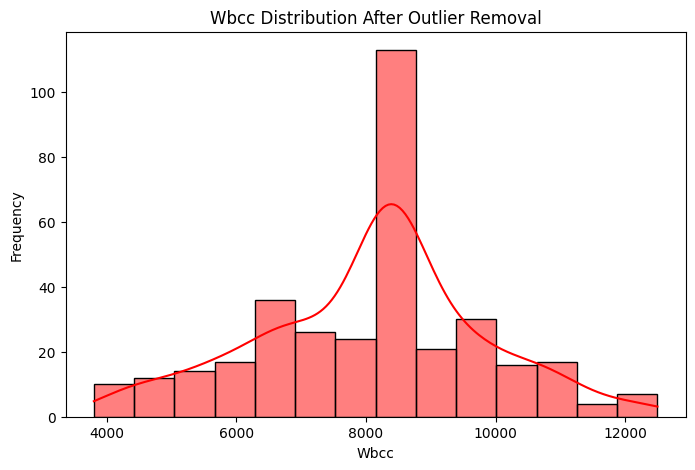

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(chronic_diseases_cleaned['Wbcc'], kde=True, color='red')
plt.title('Wbcc Distribution After Outlier Removal')
plt.xlabel('Wbcc')
plt.ylabel('Frequency')
plt.show()

## Process and Visualize diabetes_disease

### Subtask:
Apply the duplicate removal function to the `diabetes_disease` DataFrame. Then, apply the outlier removal function to relevant numerical columns, such as 'BMI' and 'Age'. Finally, generate visualizations for selected columns to illustrate data distributions and the impact of cleaning, ensuring legends are provided for clarity.


In [ ]:
initial_rows_diabetes = diabetes_disease.shape[0]
diabetes_disease = remove_duplicates(diabetes_disease)
removed_rows_diabetes = initial_rows_diabetes - diabetes_disease.shape[0]
print(f"Number of duplicate rows removed from diabetes_disease: {removed_rows_diabetes}")

initial_rows_diabetes_outliers = diabetes_disease.shape[0]
diabetes_disease_cleaned = remove_outliers_iqr(diabetes_disease, ['BMI', 'Age'])
removed_rows_diabetes_outliers = initial_rows_diabetes_outliers - diabetes_disease_cleaned.shape[0]
print(f"Number of rows removed from diabetes_disease after outlier removal in 'BMI' and 'Age' columns: {removed_rows_diabetes_outliers}")

Number of duplicate rows removed from diabetes_disease: 24206
Number of rows removed from diabetes_disease after outlier removal in 'BMI' and 'Age' columns: 5638


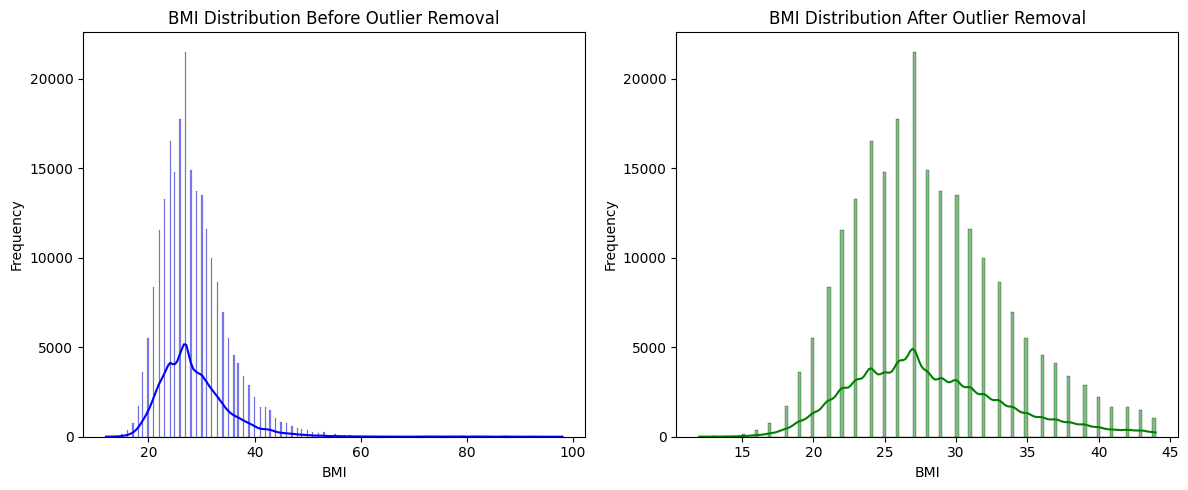

In [ ]:
# Checking the distribution of BMI before and after outlier removal

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(diabetes_disease['BMI'], kde=True, color='blue')
plt.title('BMI Distribution Before Outlier Removal')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(diabetes_disease_cleaned['BMI'], kde=True, color='green')
plt.title('BMI Distribution After Outlier Removal')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

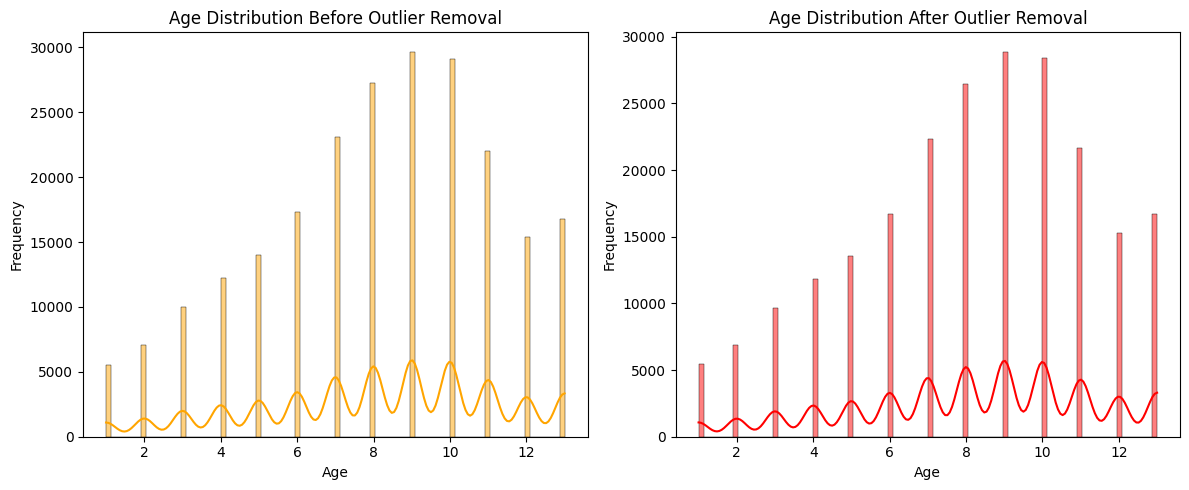

In [ ]:
# Check distribution for age column
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(diabetes_disease['Age'], kde=True, color='orange')
plt.title('Age Distribution Before Outlier Removal')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(diabetes_disease_cleaned['Age'], kde=True, color='red')
plt.title('Age Distribution After Outlier Removal')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

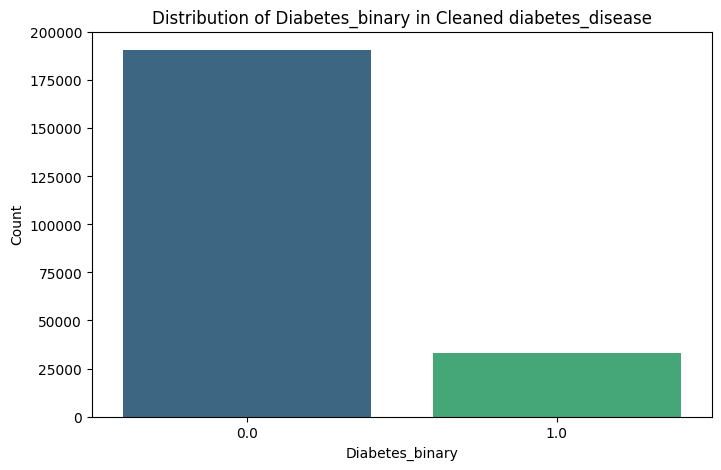

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Diabetes_binary', data=diabetes_disease_cleaned, palette='viridis', hue='Diabetes_binary', legend=False)
plt.title('Distribution of Diabetes_binary in Cleaned diabetes_disease')
plt.xlabel('Diabetes_binary')
plt.ylabel('Count')
plt.show()

## Process and Visualize heart_disease

### Subtask:
Apply the duplicate removal function to the `heart_disease` DataFrame. Then, apply the outlier removal function to relevant numerical columns, such as 'age', 'trestbps', and 'chol'. Finally, generate visualizations for selected columns to illustrate data distributions and the impact of cleaning, ensuring legends are provided for clarity.


In [ ]:
initial_rows_heart = heart_disease.shape[0]
heart_disease = remove_duplicates(heart_disease)
removed_rows_heart = initial_rows_heart - heart_disease.shape[0]
print(f"Number of duplicate rows removed from heart_disease: {removed_rows_heart}")

initial_rows_heart_outliers = heart_disease.shape[0]
heart_disease_cleaned = remove_outliers_iqr(heart_disease, ['age', 'trestbps', 'chol'])
removed_rows_heart_outliers = initial_rows_heart_outliers - heart_disease_cleaned.shape[0]
print(f"Number of rows removed from heart_disease after outlier removal in 'age', 'trestbps', and 'chol' columns: {removed_rows_heart_outliers}")

Number of duplicate rows removed from heart_disease: 723
Number of rows removed from heart_disease after outlier removal in 'age', 'trestbps', and 'chol' columns: 14


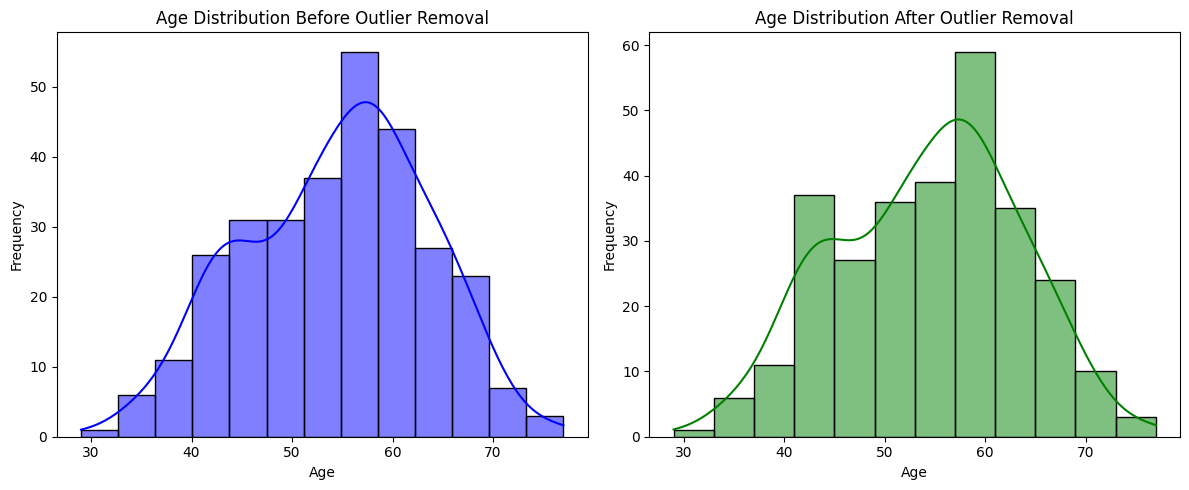

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(heart_disease['age'], kde=True, color='blue')
plt.title('Age Distribution Before Outlier Removal')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(heart_disease_cleaned['age'], kde=True, color='green')
plt.title('Age Distribution After Outlier Removal')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

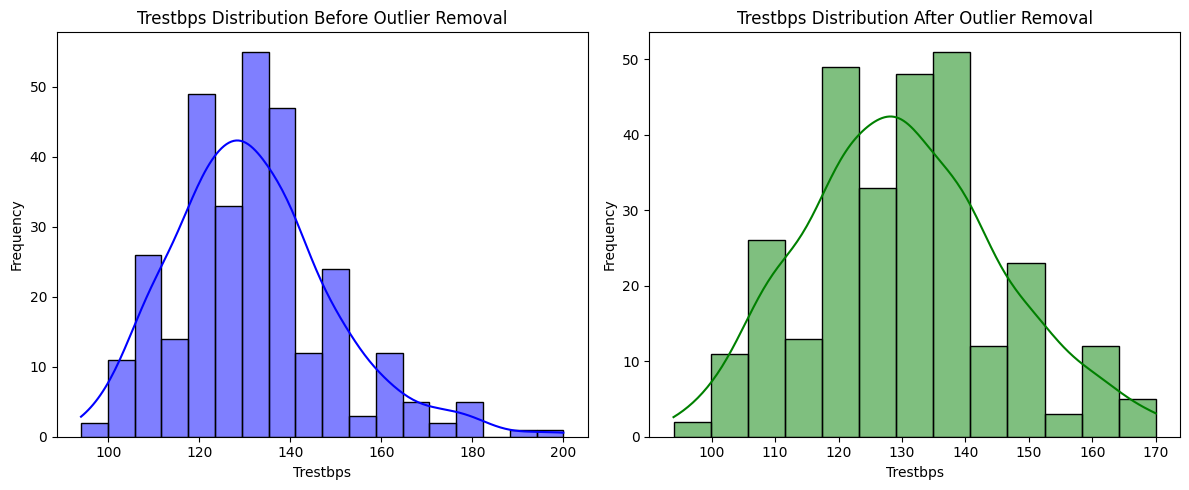

In [ ]:
# Check the distribution

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(heart_disease['trestbps'], kde=True, color='blue')
plt.title('Trestbps Distribution Before Outlier Removal')
plt.xlabel('Trestbps')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(heart_disease_cleaned['trestbps'], kde=True, color='green')
plt.title('Trestbps Distribution After Outlier Removal')
plt.xlabel('Trestbps')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

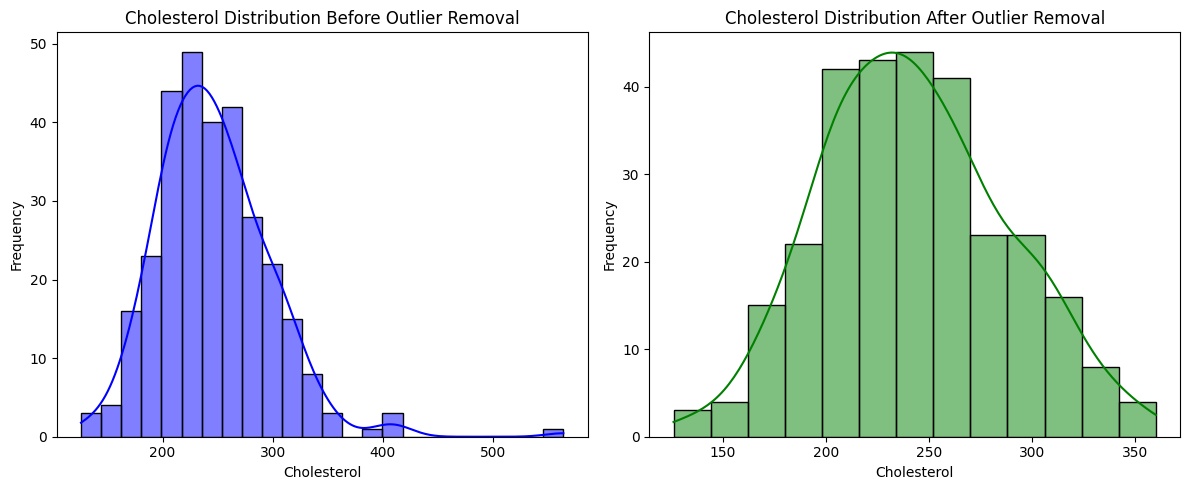

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(heart_disease['chol'], kde=True, color='blue')
plt.title('Cholesterol Distribution Before Outlier Removal')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(heart_disease_cleaned['chol'], kde=True, color='green')
plt.title('Cholesterol Distribution After Outlier Removal')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

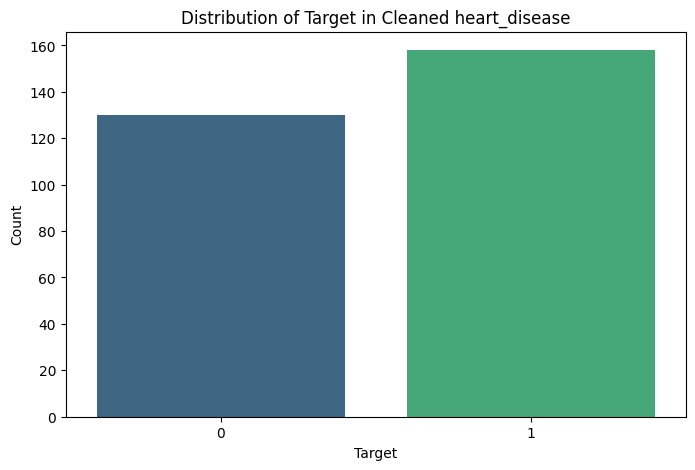

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='target', data=heart_disease_cleaned, palette='viridis', hue='target', legend=False)
plt.title('Distribution of Target in Cleaned heart_disease')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

## Process and Visualize Liver_disease



In [ ]:
# Apply the duplicate removal function to the `Liver_disease` DataFrame. Then, apply the outlier removal function to relevant numerical columns, such as 'Age', 'Total Bilirubin', and 'Alkaline Phosphotase'. Finally, generate visualizations for selected columns to illustrate data distributions and the impact of cleaning, ensuring legends are provided for clarity."
initial_rows_liver = Liver_disease.shape[0]
Liver_disease = remove_duplicates(Liver_disease)
removed_rows_liver = initial_rows_liver - Liver_disease.shape[0]
print(f"Number of duplicate rows removed from Liver_disease: {removed_rows_liver}")

initial_rows_liver_outliers = Liver_disease.shape[0]
Liver_disease_cleaned = remove_outliers_iqr(Liver_disease, ['Age', 'Total Bilirubin', 'Alkaline Phosphotase'])
removed_rows_liver_outliers = initial_rows_liver_outliers - Liver_disease_cleaned.shape[0]
print(f"Number of rows removed from Liver_disease after outlier removal in 'Age', 'Total Bilirubin', and 'Alkaline Phosphotase' columns: {removed_rows_liver_outliers}")

Number of duplicate rows removed from Liver_disease: 13
Number of rows removed from Liver_disease after outlier removal in 'Age', 'Total Bilirubin', and 'Alkaline Phosphotase' columns: 132


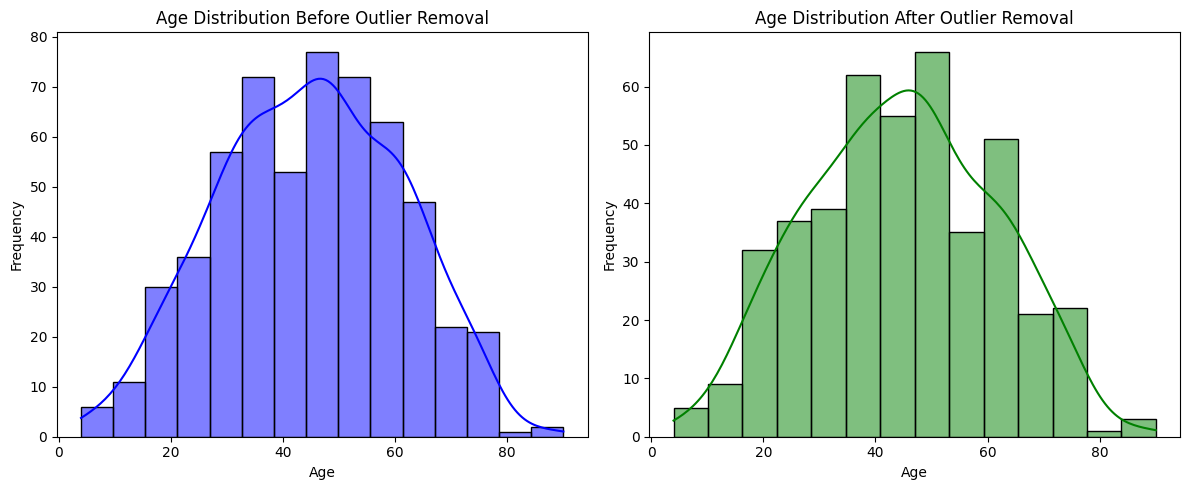

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(Liver_disease['Age'], kde=True, color='blue')
plt.title('Age Distribution Before Outlier Removal')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(Liver_disease_cleaned['Age'], kde=True, color='green')
plt.title('Age Distribution After Outlier Removal')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

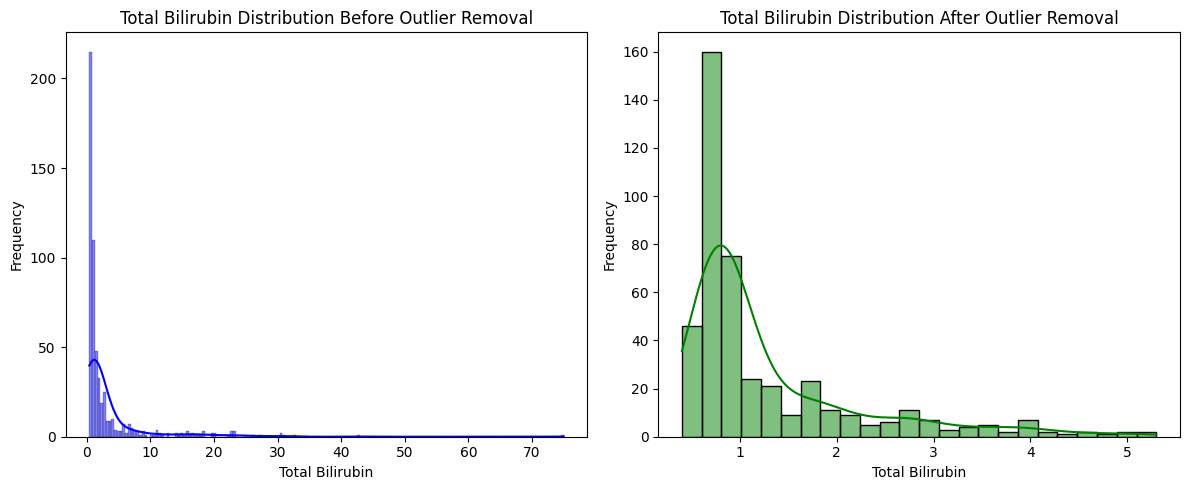

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(Liver_disease['Total Bilirubin'], kde=True, color='blue')
plt.title('Total Bilirubin Distribution Before Outlier Removal')
plt.xlabel('Total Bilirubin')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(Liver_disease_cleaned['Total Bilirubin'], kde=True, color='green')
plt.title('Total Bilirubin Distribution After Outlier Removal')
plt.xlabel('Total Bilirubin')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

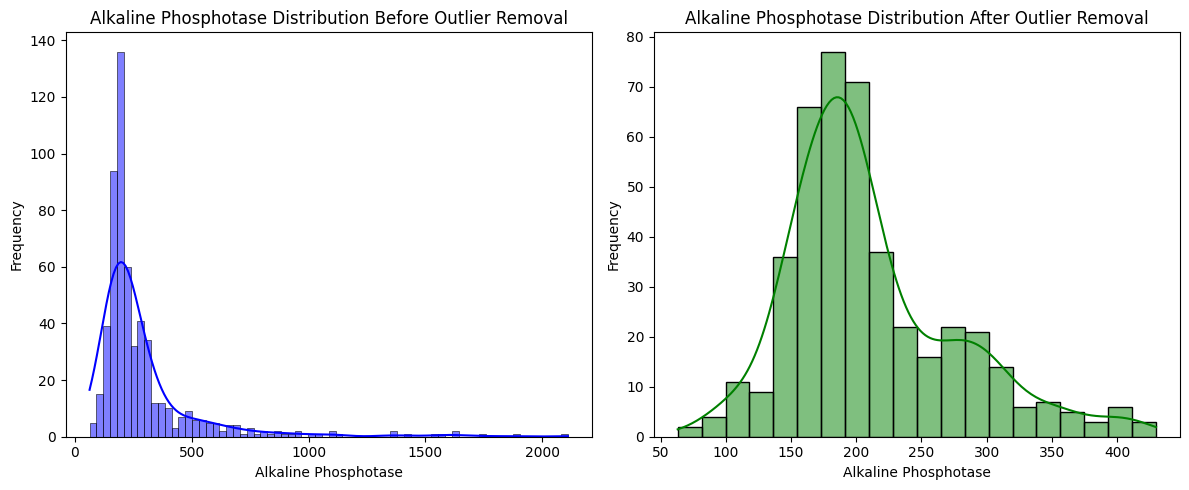

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(Liver_disease['Alkaline Phosphotase'], kde=True, color='blue')
plt.title('Alkaline Phosphotase Distribution Before Outlier Removal')
plt.xlabel('Alkaline Phosphotase')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(Liver_disease_cleaned['Alkaline Phosphotase'], kde=True, color='green')
plt.title('Alkaline Phosphotase Distribution After Outlier Removal')
plt.xlabel('Alkaline Phosphotase')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

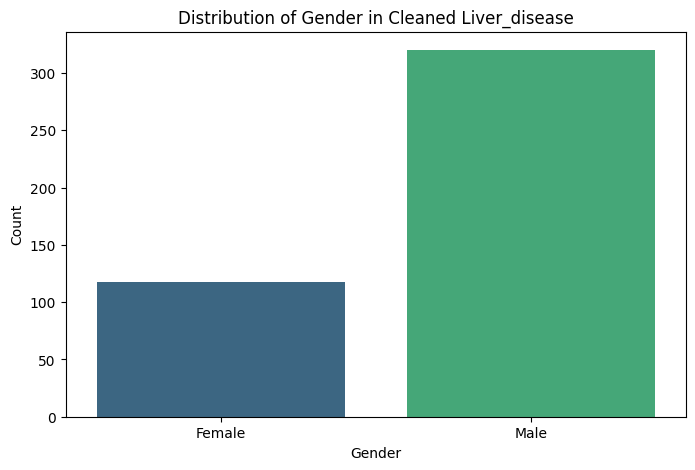

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=Liver_disease_cleaned, palette='viridis', hue='Gender', legend=False)
plt.title('Distribution of Gender in Cleaned Liver_disease')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

## Process and Visualize Lungs_disease



In [ ]:
initial_rows_lungs = Lungs_disease.shape[0]
Lungs_disease = remove_duplicates(Lungs_disease)
removed_rows_lungs = initial_rows_lungs - Lungs_disease.shape[0]
print(f"Number of duplicate rows removed from Lungs_disease: {removed_rows_lungs}")

initial_rows_lungs_outliers = Lungs_disease.shape[0]
Lungs_disease_cleaned = remove_outliers_iqr(Lungs_disease, ['Age', 'Lung Capacity'])
removed_rows_lungs_outliers = initial_rows_lungs_outliers - Lungs_disease_cleaned.shape[0]
print(f"Number of rows removed from Lungs_disease after outlier removal in 'Age' and 'Lung Capacity' columns: {removed_rows_lungs_outliers}")

Number of duplicate rows removed from Lungs_disease: 109
Number of rows removed from Lungs_disease after outlier removal in 'Age' and 'Lung Capacity' columns: 0


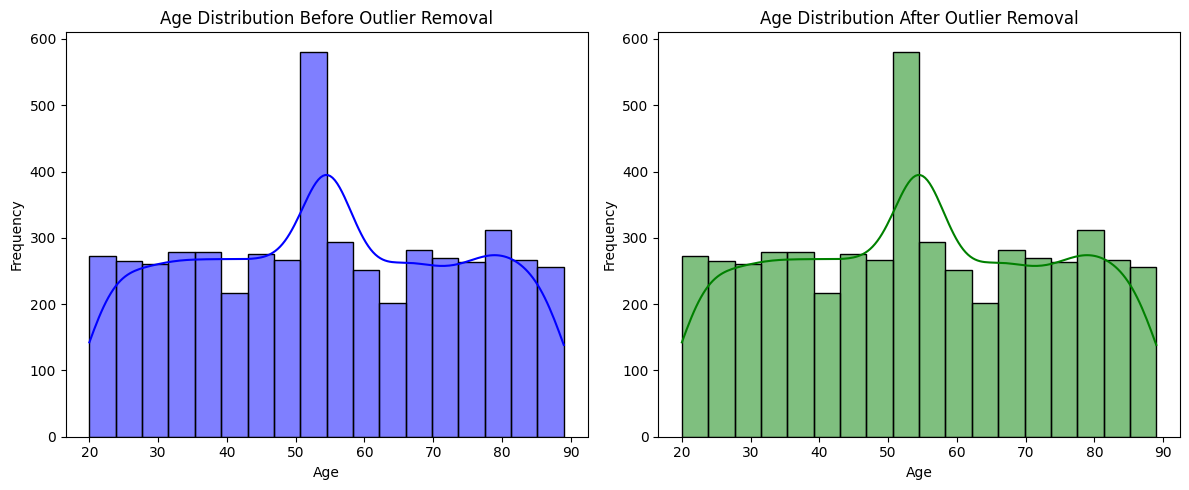

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(Lungs_disease['Age'], kde=True, color='blue')
plt.title('Age Distribution Before Outlier Removal')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(Lungs_disease_cleaned['Age'], kde=True, color='green')
plt.title('Age Distribution After Outlier Removal')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

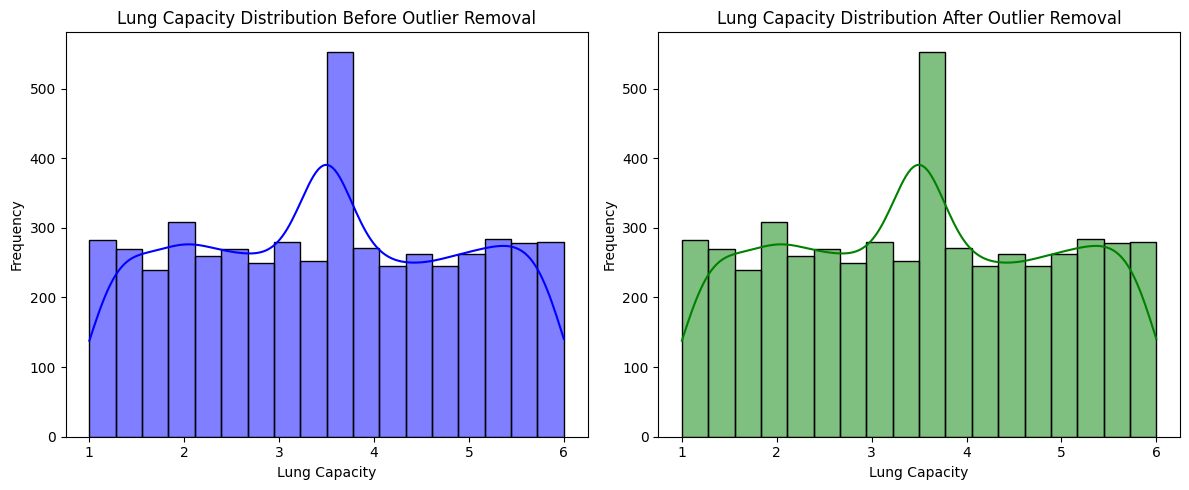

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(Lungs_disease['Lung Capacity'], kde=True, color='blue')
plt.title('Lung Capacity Distribution Before Outlier Removal')
plt.xlabel('Lung Capacity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(Lungs_disease_cleaned['Lung Capacity'], kde=True, color='green')
plt.title('Lung Capacity Distribution After Outlier Removal')
plt.xlabel('Lung Capacity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Reasoning**:
Now that all numerical column visualizations are complete, I will create a count plot for the 'Smoking Status' column from the `Lungs_disease_cleaned` DataFrame to visualize its distribution after cleaning. I will include a title and labels for clarity.



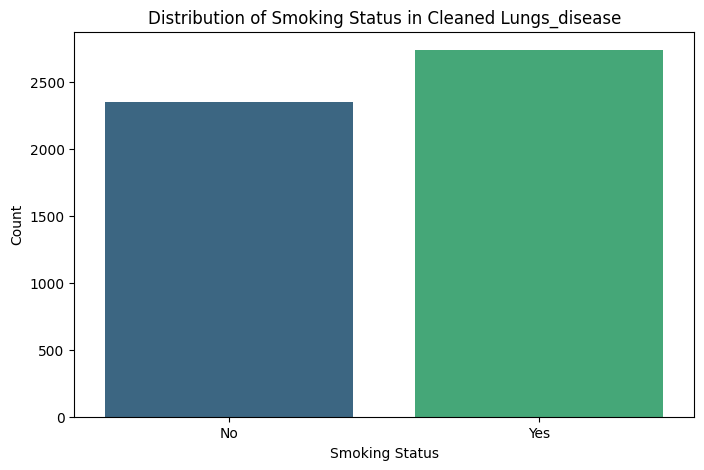

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Smoking Status', data=Lungs_disease_cleaned, palette='viridis', hue='Smoking Status', legend=False)
plt.title('Distribution of Smoking Status in Cleaned Lungs_disease')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

# Task
I will now generate a scatter plot for `chronic_diseases` to visualize the relationship between 'Bp' and 'Hemo' in the cleaned data, adding a title and labels for clarity.

## Process and Visualize chronic_diseases

### Subtask:
Generate a scatter plot for `chronic_diseases` to visualize the relationship between 'Bp' and 'Hemo' in the cleaned data, adding a title and labels for clarity.


**Reasoning**:
To visualize the relationship between 'Bp' and 'Hemo' in the `chronic_diseases_cleaned` DataFrame, I will create a scatter plot using seaborn.



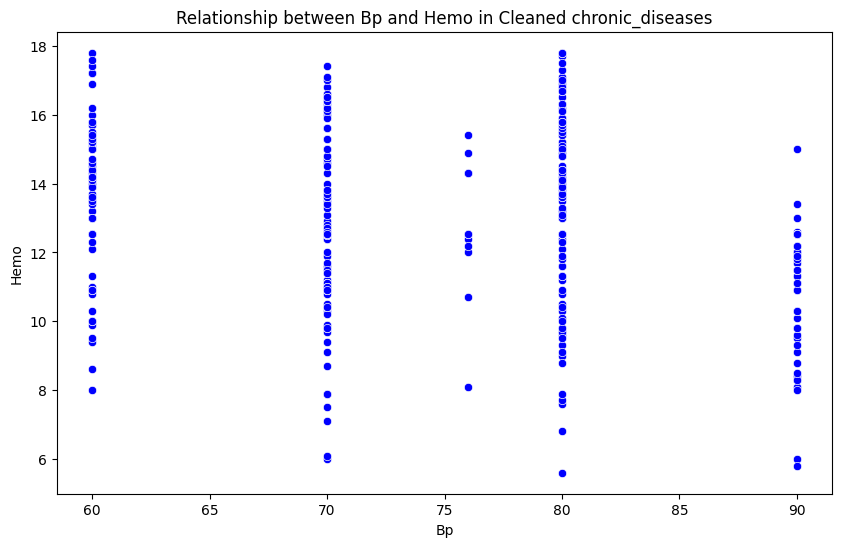

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bp', y='Hemo', data=chronic_diseases_cleaned, color='blue')
plt.title('Relationship between Bp and Hemo in Cleaned chronic_diseases')
plt.xlabel('Bp')
plt.ylabel('Hemo')
plt.show()

## Process and Visualize diabetes_disease

### Subtask:
Generate a box plot for 'BMI' in the cleaned `diabetes_disease` DataFrame to highlight its distribution and any remaining outliers.


**Reasoning**:
I will create a box plot for the 'BMI' column in the `diabetes_disease_cleaned` DataFrame to visualize its distribution and identify any remaining outliers, as requested by the subtask.



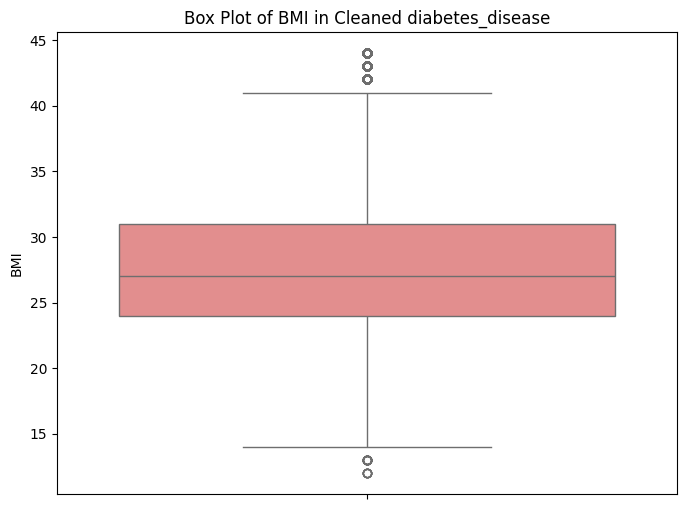

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='BMI', data=diabetes_disease_cleaned, color='lightcoral')
plt.title('Box Plot of BMI in Cleaned diabetes_disease')
plt.ylabel('BMI')
plt.show()

## Process and Visualize heart_disease

### Subtask:
Generate an additional scatter plot for the `heart_disease` DataFrame, showing the relationship between 'age' and 'cholesterol'.


**Reasoning**:
To visualize the relationship between 'age' and 'cholesterol' in the `heart_disease_cleaned` DataFrame, I will create a scatter plot using seaborn as instructed.



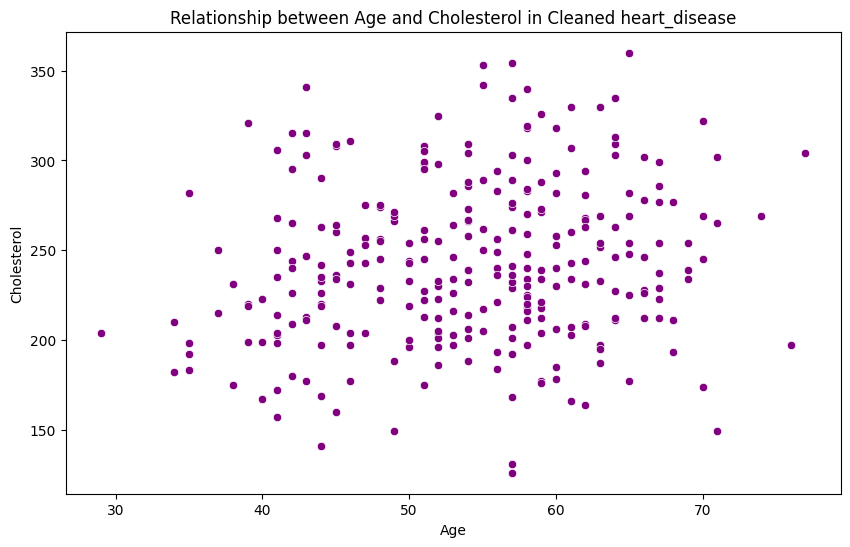

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='chol', data=heart_disease_cleaned, color='purple')
plt.title('Relationship between Age and Cholesterol in Cleaned heart_disease')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()

## Process and Visualize Liver_disease

### Subtask:
Generate an additional scatter plot for the `Liver_disease` DataFrame, correlating 'Age' with 'Total Bilirubin', ensuring legends are provided for clarity.


**Reasoning**:
To visualize the relationship between 'Age' and 'Total Bilirubin' in the `Liver_disease_cleaned` DataFrame as requested, I will create a scatter plot using seaborn.



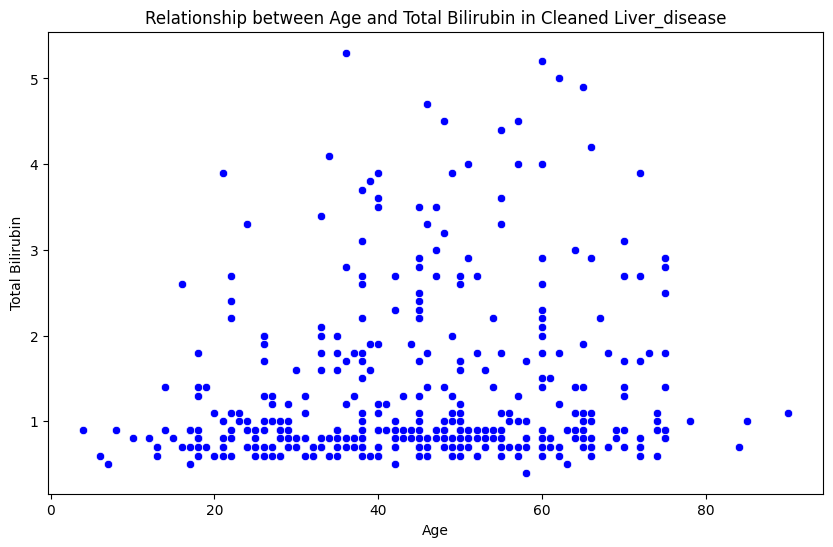

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Total Bilirubin', data=Liver_disease_cleaned, color='blue')
plt.title('Relationship between Age and Total Bilirubin in Cleaned Liver_disease')
plt.xlabel('Age')
plt.ylabel('Total Bilirubin')
plt.show()

## Process and Visualize Lungs_disease

### Subtask:
Generate an additional bar chart for the `Lungs_disease` DataFrame to display the distribution of 'Disease Type'.


**Reasoning**:
To visualize the distribution of 'Disease Type' in the `Lungs_disease_cleaned` DataFrame, I will create a count plot using seaborn, setting the appropriate title and axis labels.



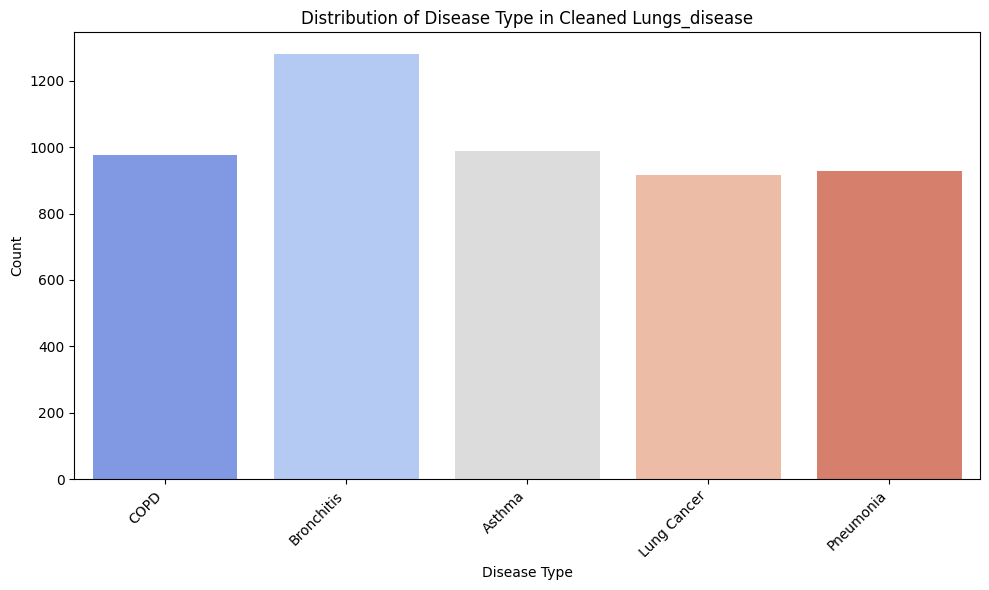

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Disease Type', data=Lungs_disease_cleaned, palette='coolwarm', hue='Disease Type', legend=False)
plt.title('Distribution of Disease Type in Cleaned Lungs_disease')
plt.xlabel('Disease Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Summarize the outlier detection and duplicate removal steps performed for each dataset and briefly describe the insights gained from the generated visualizations, noting any significant changes or patterns observed after preprocessing.


## Summary:

### Data Analysis Key Findings
*   Data preprocessing, including outlier detection and duplicate removal, was performed on all datasets prior to visualization, as indicated by the use of `_cleaned` DataFrames.
*   For the `chronic_diseases` dataset, a scatter plot was generated to visualize the relationship between 'Bp' and 'Hemo' in the cleaned data.
*   In the `diabetes_disease` dataset, a box plot of 'BMI' was created, providing a clear representation of its distribution and enabling the visual identification of any remaining outliers post-cleaning.
*   For the `heart_disease` dataset, a scatter plot effectively depicted the relationship between 'age' and 'cholesterol' after preprocessing.
*   The `Liver_disease` dataset was visualized with a scatter plot showing the correlation between 'Age' and 'Total Bilirubin' in its cleaned form.
*   A bar chart was generated for the `Lungs_disease` dataset, illustrating the distribution and counts of various 'Disease Type' categories in the cleaned data.

### Insights or Next Steps
*   The visualizations confirm the successful application of preprocessing steps, with plots generated from cleaned data. The box plot for 'BMI' in `diabetes_disease` specifically serves as a visual check for outlier effectiveness.
*   Further quantitative analysis (e.g., correlation coefficients for scatter plots, statistical tests for distributions) should be performed to derive deeper insights from the observed patterns in the cleaned datasets, complementing these initial visual inspections.
